In [1]:


"""
    t, y = myeulersv(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a matrix of correspondinig values
of the solution, y(t_i)
"""
function myeulersv(fun, a, b, n, y1)
    t = range(a, b, n)
    neqs = length(y1)
    dydt = zeros(neqs) #allocate vector of derivatives
    y = zeros(neqs, n) #allocate the matrix of solution
    h = t[2] - t[1]
    y[:, 1] = y1
    for i = 1:n-1
        k1 = h*fun(t[i], y[:, i])
        y[:, i+1] = y[:, i] + k1
    end
    return t, y
end

myeulersv

In [ ]:

"""
   dy/dt = funv(t,y) 

Right hand side of the oscillator with friction
"""
function frict(t, y) #oscillates with friction
    dydt = zeros(2) 
    dydt[1] = y[2]
    dydt[2] = -y[1] - y[2]
    return dydt
end 

In [ ]:

a = 0.0
b = 10.0 
n = 100
y1 = [1.0, 0.0]

In [ ]:

t, y =  myeulersv(frict, a, b, n, y1)

In [2]:

using PyPlot

In [ ]:

plot(t, y[1, :], label = "coordinate")
plot(t, y[2, :], label ="velocity")
grid(true) 
title("Oscillator with Friction")
legend()
xlabel("Time")

In [ ]:

plot(y[1, :] , y[2, :])
grid(true) 
scatter(y1...) #shows where we start
title("Oscillator with Friction")
xlabel("Coordinate")
ylabel("Velocity")

 ### Spherical Bessel Function

In [3]:

function bes(x, u) 
    dudx = zeros(2)
    dudx[1] = u[2]
    dudx[2] = abs(x) > eps() ? -2/x * u[2] - (1 - 2/x^2) * u[1] : 0.0
    return dudx
end 

bes (generic function with 1 method)

In [6]:

abes = 0.0
bbes = 20.0
nbes = 4000
u0bes = [0.0, 1/3]

2-element Vector{Float64}:
 0.0
 0.3333333333333333

In [7]:

x, u = myeulersv(bes, abes, bbes, nbes, u0bes)

(0.0:0.005001250312578144:20.0, [0.0 0.0016670834375260481 … -0.01873680946220431 -0.01848870732252748; 0.3333333333333333 0.3333333333333333 … 0.049608022828381886 0.04967644511115136])

In [8]:

j1exact(x) = abs(x) > eps() ? sin(x)/x^2 - cos(x)/x : 0

j1exact (generic function with 1 method)

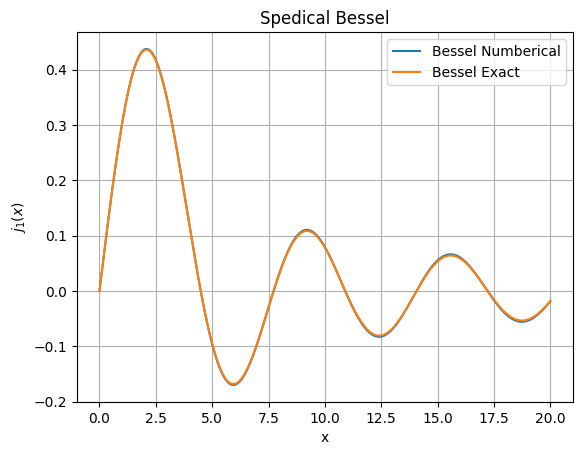

PyObject Text(0.5, 1.0, 'Spedical Bessel')

In [9]:

plot(x, u[1, :], label="Bessel Numberical")
plot(x, j1exact.(x), label="Bessel Exact")
grid(true)
xlabel("x")
ylabel(L"j_1(x)")
legend()
title("Spedical Bessel")